<!--#  **ML Campus Batch Aug 2022 - Bangalore**
### Assignment 9 - 
-->
Deploy a Tensorflow Model using TF Serving as a REST API
##### **Features**
*   Training a DL model using TF 
*   Saving the model to be used in TF serving library
*   Making REST

<!--

###### submitted by: Neeraj Ganji 
###### submitted on: 12th OCT 2022

ID: 23133

-->

### **DEPLOYING A MNIST (Digits) MODEL USING TF SERVING AS REST API**



##### Importing the required libraries and dependencies

In [1]:
import os
import json
import tempfile
import requests
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

##### Installing dependencies for Colab environment

In [2]:
import sys
!pip install -Uq grpcio==1.26.0

     |████████████████████████████████| 2.4 MB 4.8 MB/s 


### Installing Tensorflow Model Server

##### Add TensorFlow Serving distribution URI as a package source 


In [3]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -
!{SUDO_IF_NEEDED} apt update

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  39240      0 --:--:-- --:--:-- --:--:-- 39240
OK
/bin/bash: {SUDO_IF_NEEDED}: command not found


##### Installing TensorFlow ModelServer

In [4]:
!wget 'http://storage.googleapis.com/tensorflow-serving-apt/pool/tensorflow-model-server-universal-2.8.0/t/tensorflow-model-server-universal/tensorflow-model-server-universal_2.8.0_all.deb'
!dpkg -i tensorflow-model-server-universal_2.8.0_all.deb

--2022-10-12 21:12:45--  http://storage.googleapis.com/tensorflow-serving-apt/pool/tensorflow-model-server-universal-2.8.0/t/tensorflow-model-server-universal/tensorflow-model-server-universal_2.8.0_all.deb
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 108.177.111.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335421916 (320M) [application/x-debian-package]
Saving to: ‘tensorflow-model-server-universal_2.8.0_all.deb’

tensorflow-model-se 100%[===================>] 319.88M   284MB/s    in 1.1s    

2022-10-12 21:12:47 (284 MB/s) - ‘tensorflow-model-server-universal_2.8.0_all.deb’ saved [335421916/335421916]

Selecting previously unselected package tensorflow-model-server-universal.
(Reading database ... 123934 files and directories currently installed.)
Preparing to unpack tensorflow-model-server-universal_2.8.0_all.deb ...
Unp

#### Importing the MNSIT(digit) dataset

In [5]:
from tensorflow.keras.datasets import mnist
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# one hot encode target values
train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')

# normalize to range 0-1
x_train = train_norm / 255.0
x_test = test_norm / 255.0

##### Shapes of the train and test

In [7]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print("Number Of Classes: ", len(set(y_train)))

Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)
Number Of Classes:  10


##### Create a list of class names


In [8]:
classes = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]

##### Dataset images

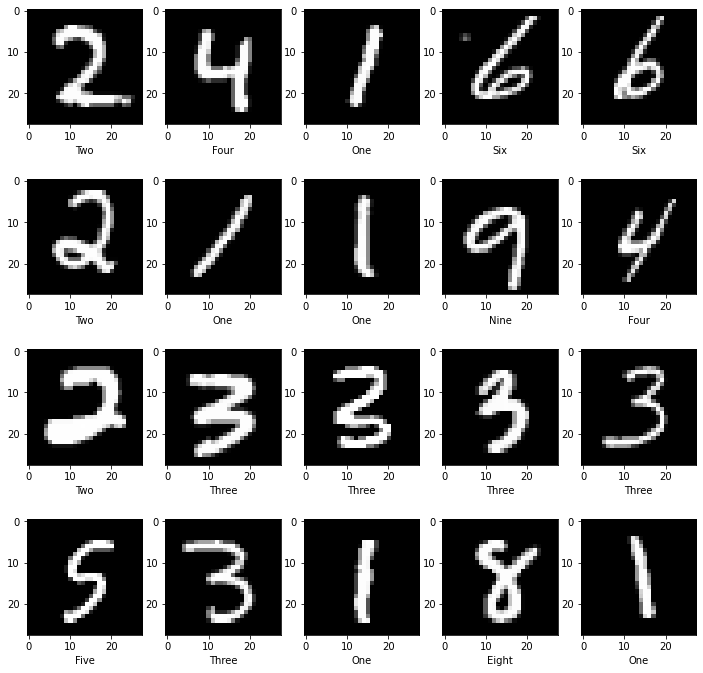

In [9]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    x=np.random.randint(0, len(x_train))
    plt.imshow(x_train[x].reshape(28,28), cmap=plt.gray())
    plt.xlabel(classes[y_train[x]])
plt.show()

### Model Building

##### Importing the required libraries for cnn model

In [10]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

##### Defining the model

In [11]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
	return model

##### Model fitting

In [12]:
model = define_model()
model.fit(x_train, y_train, validation_data = [x_test, y_test],  epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.1223 - accuracy: 0.9618 - val_loss: 0.0500 - val_accuracy: 0.9838
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0564 - val_accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.0329 - val_accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0359 - val_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0258 - val_accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0311 - val_accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.0274 - val_accuracy

##### Test dataset prediction using the model we trained just now!

1/1 [==============================] - 0s 15ms/step


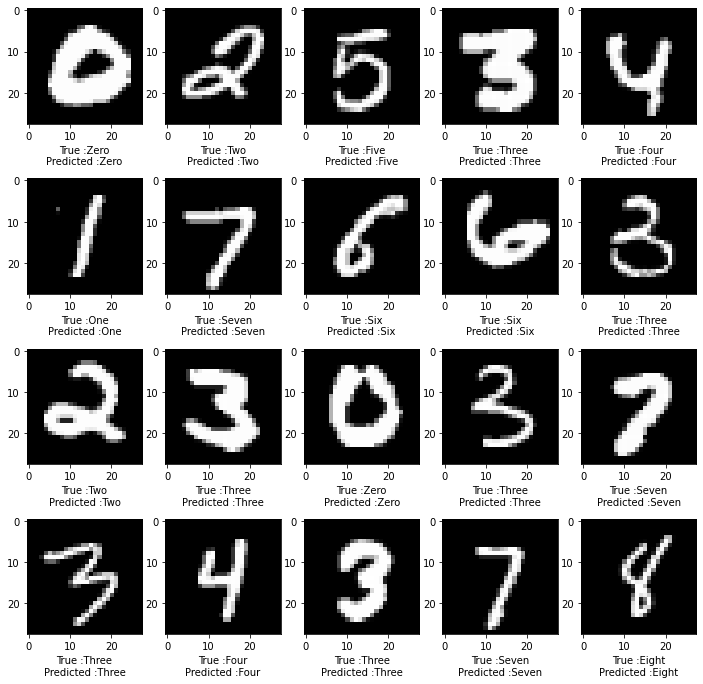

In [13]:
import random
from numpy import argmax

plt.figure(figsize=(12,12))
for i in range(20):
    rando = random.randint(0,len(x_test)-1)
    plt.subplot(4,5,i+1)
    x=np.random.randint(0, len(x_train))
    plt.imshow(x_test[rando].reshape(28,28), cmap=plt.gray())
    digit = model.predict(x_test[rando].reshape(1,28,28,1))
    plt.xlabel("True :"+classes[y_test[rando]] + "\n" + "Predicted :" + classes[np.argmax(digit)])
plt.show()

### Saving the Model

In [14]:
MODEL_DIR = "/model_deploy_using_tfserver"
version=1

export_path= MODEL_DIR+"/1"

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}


Saved model:
total 168
drwxr-xr-x 2 root root   4096 Oct 12 21:15 assets
-rw-r--r-- 1 root root  17741 Oct 12 21:15 keras_metadata.pb
-rw-r--r-- 1 root root 140720 Oct 12 21:15 saved_model.pb
drwxr-xr-x 2 root root   4096 Oct 12 21:15 variables


##### Examine the saved model


In [15]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['conv2d_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_conv2d_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Concrete Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          inputs:

### **Run the TensorFlow Model Server**

##### we will write the value of the Python variable to an environment variable using the os.environ function.**


In [16]:
os.environ["MODEL_DIR"] = MODEL_DIR

##### We will now launch the TensorFlow model server with a bash script.


In [17]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=1000 \
  --model_name=digit_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

##### Now we can take a look at the server log.


In [18]:
!tail server.log

##### Create JSON Object for Test Data upto 100 dataset.


In [19]:
data = json.dumps({'signature_name' : 'serving_default' , 'instances' : x_test[:100].tolist()})
print(data)

{"signature_name": "serving_default", "instances": [[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], 

### Making Inference Request and getting the prediction.

In [20]:
!pip install -q requests

import requests

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:1000/v1/models/digit_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']



##### Predicting the Digit using TF Serving as a REST API

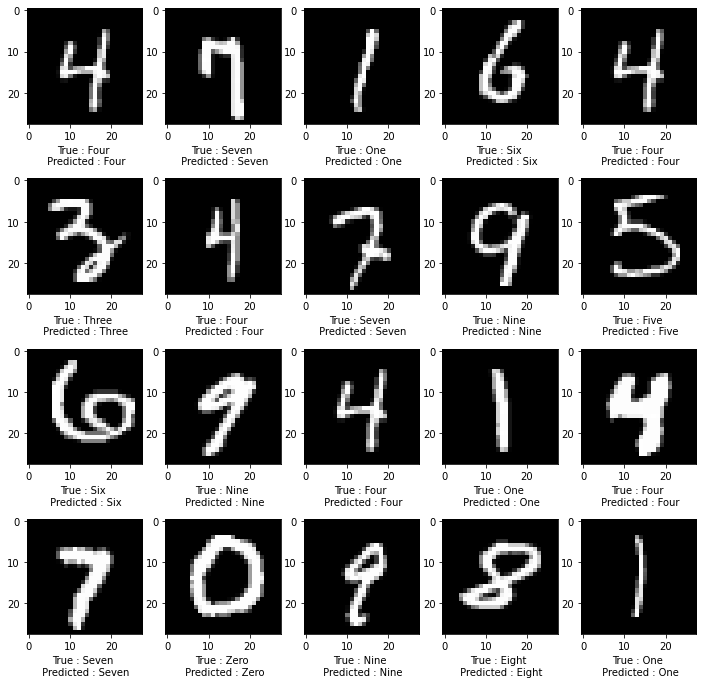

In [21]:
predictions = np.array(predictions)
plt.figure(figsize=(12,12))
for i in range(20):
    rando = random.randint(0,100)
    plt.subplot(4,5,i+1)
    x=np.random.randint(0, len(x_train))
    plt.imshow(x_test[rando].reshape(28,28), cmap=plt.gray())
    plt.xlabel('True : {} \n Predicted : {}'.format(classes[y_test[rando]],classes[np.argmax(predictions[rando])]))
plt.show()

## Thank You :)